# Modelling and Analysis of Complex Networks
## Exercise 2
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.

In [2]:
'Selecting dataset is Group 4'
import pandas as pd
facebook_edges=pd.read_csv('414.edges',header=None)
twitter_edges=pd.read_csv('1046661.edges',header=None)
print("Total Facebook Network are ",facebook_edges.head(5))
print("Total Twitter network are ",twitter_edges.head(5))

Total Facebook Network are           0
0  650 647
1  461 544
2  614 515
3  363 348
4  436 428
Total Twitter network are                   0
0  1044771 7423322
1  9921142 4556941
2  2916671 1049111
3    17743 1452261
4  1403031 1049981


Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.

In [3]:
import numpy as np
facebook_edges[['edge1', 'edge2']] = facebook_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_facebook_edges=list(zip(facebook_edges['edge1'],facebook_edges['edge2']))
list_facebook_edges[:10] # 10 rows

[('650', '647'),
 ('461', '544'),
 ('614', '515'),
 ('363', '348'),
 ('436', '428'),
 ('400', '591'),
 ('636', '630'),
 ('500', '428'),
 ('524', '553'),
 ('561', '651')]

In [4]:
twitter_edges[['edge1', 'edge2']] = twitter_edges[0].apply(lambda x: pd.Series(str(x).split(" ")))
list_twitter_edges=list(zip(twitter_edges['edge1'],twitter_edges['edge2']))
list_twitter_edges[:10]

[('1044771', '7423322'),
 ('9921142', '4556941'),
 ('2916671', '1049111'),
 ('17743', '1452261'),
 ('1403031', '1049981'),
 ('1118161', '1117341'),
 ('6100262', '51421542'),
 ('991221', '814153'),
 ('1117341', '1118161'),
 ('1116721', '795536')]

We understand and draw our networks using the network library.

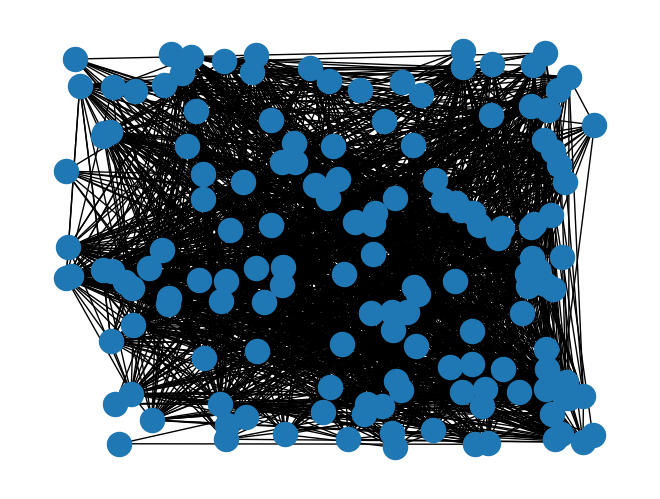

In [5]:
import networkx as nx
facebook_network = nx.from_edgelist(list_facebook_edges)
nx.draw_random(facebook_network)

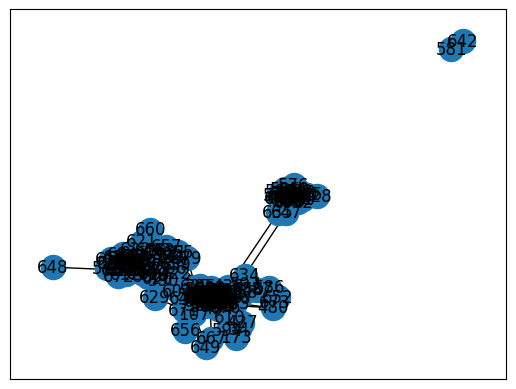

In [6]:
nx.draw_networkx(facebook_network)

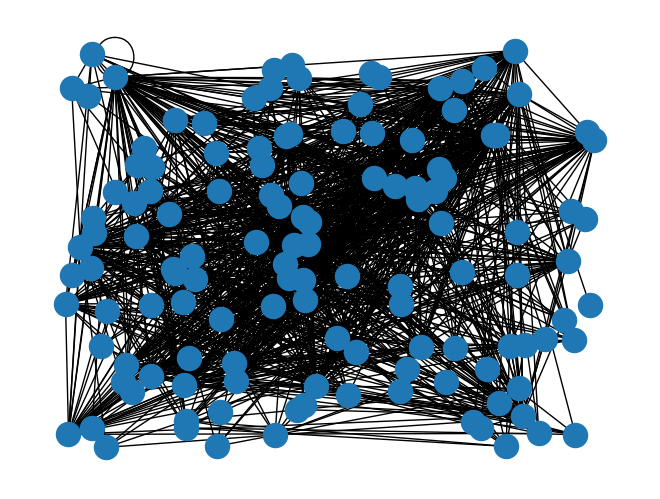

In [7]:
twitter_network = nx.from_edgelist(list_twitter_edges)
nx.draw_random(twitter_network)

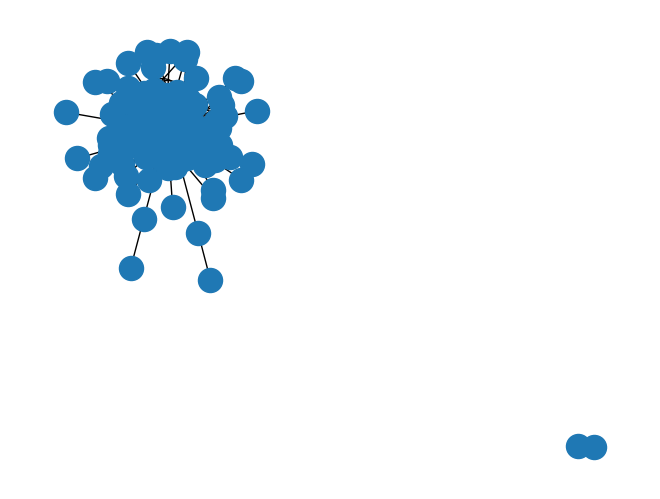

In [8]:
nx.draw(twitter_network)

# (a) What is the degree distribution of the network? Please plot the distribution and attach it to your answer sheet


Degree distribution: The degree distribution represent the probability that a randomly chosen node will have degree k.

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
def plot_degree_hist(G,x):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure(figsize=(8, 6))
    ax2 = fig.add_subplot(111)
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title(f"Degree histogram of {x}")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("Number of Nodes")
    fig.tight_layout()
    plt.show()

In [10]:
def plot_degree_dist(G,x):
    degrees = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degrees :
            degrees [ deg ] = 0
        degrees [ deg ] += 1
    items = sorted ( degrees . items () )
    items = sorted ( degrees . items () )
    fig = plt.figure (figsize=(8, 6))
    ax = fig.add_subplot (111)
    ax.plot([k for (k,v) in items],[v for (k,v ) in items])
    plt.show()

## Degree distribution of facebook

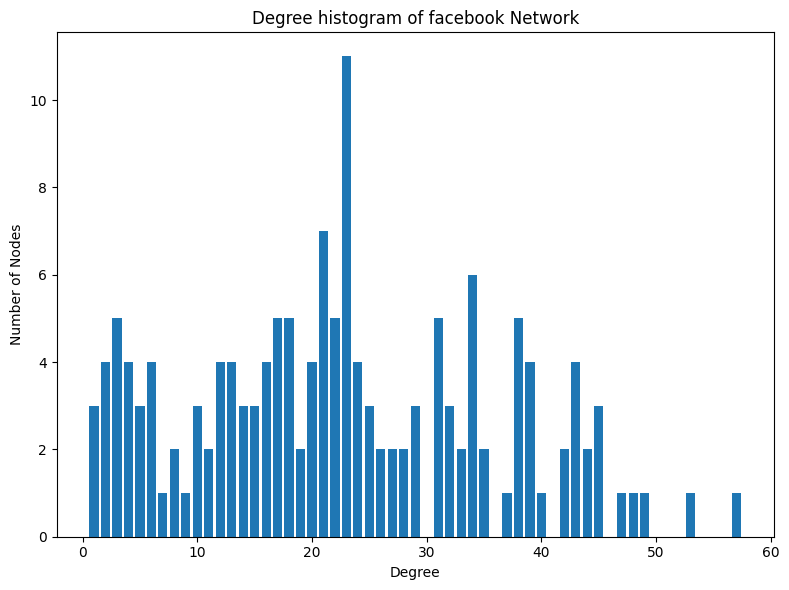

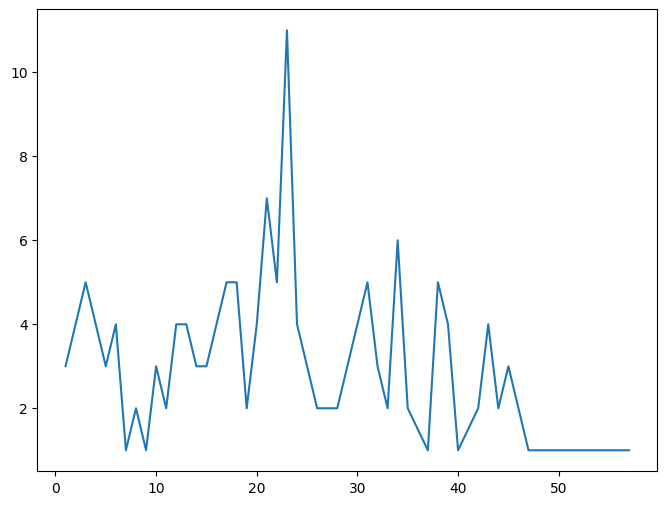

In [11]:
plot_degree_hist(facebook_network,"facebook Network") # x-axis degree vs y axis #nodes, get the same shape if we put fracton of nodes in y
plot_degree_dist(facebook_network,"facebook Network")


## Degree distribution of Twitter

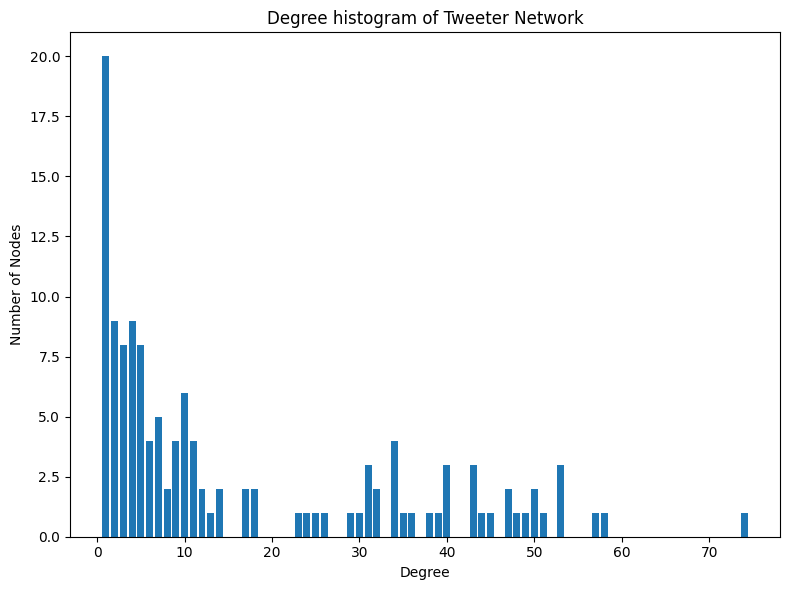

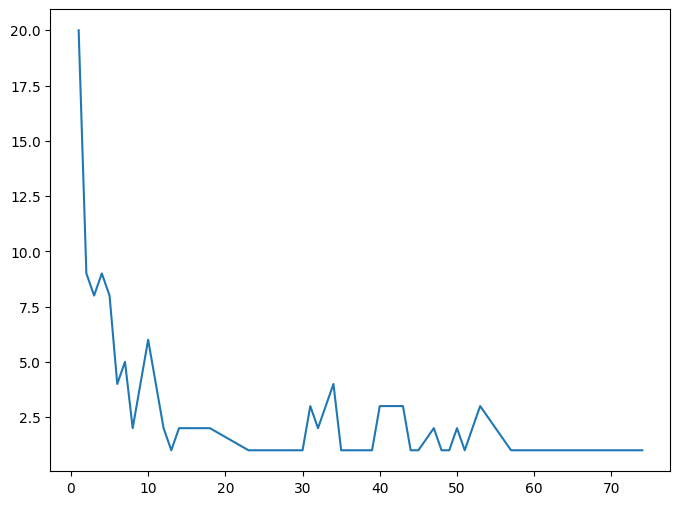

In [12]:
plot_degree_hist(twitter_network,"Tweeter Network")
plot_degree_dist(twitter_network,"Tweeter Network")

# (b) According to the degree distribution, what is the main difference between the chosen network and a random network with the same number of nodes? What may cause the difference?



We know that in a random network, the degree distribution is almost a normal distribution having centered on the average degree. However, in a real network, it is not the case -a high majority of small degree nodes, a small minority of nodes with very high degree.

In the degree distribution of facebook network(facebook_network), it looks like  degree distribution follows a normal distribution(most of the cases). In case of facebook network(facebook_network) the distribution follows normal distribution which is a bit like random network.

Similarly from the degree distribution of twitter network(twitter_network), we can see that most nodes have small amount of degrees and small number of node have degree up to 20. Therefore its degree distibution follows a Power-law distribution which we can also called it scale-free network.



# (c) What is the average path length of the network?


In [13]:
# for fb network
try:
    print(f'Average path length of tweeter:{nx.average_shortest_path_length(facebook_network)}')
except Exception as e:
  print(e)

Graph is not connected.


In [14]:
# for twitter
try:
    print(f'Average path length of tweeter: {nx.average_shortest_path_length(twitter_network)}')
except Exception as e:
  print(e)

Graph is not connected.


In [15]:
def average_path_length(graph,name):
    connected_components ={}
    if name=='facebook':
        connected_components = list(nx.connected_components(graph))
    else:
        connected_components = list(nx.strongly_connected_components(graph))
    print(f"The connected components are :{connected_components}\n\n")
    max_length = -1
    for i, component in enumerate(connected_components):
        component_graph = graph.subgraph(component)
        avg_path_length = nx.average_shortest_path_length(component_graph)
        if(avg_path_length>max_length):
            max_length = avg_path_length
        print(f"Component {i+1} - Average path Length: {avg_path_length}")
    print(f"The maximum average path length among all connected components is : {max_length}")
print("---------------FOR FACEBOOK---------------")
average_path_length(facebook_network,'facebook')



---------------FOR FACEBOOK---------------
The connected components are :[{'667', '500', '465', '632', '600', '378', '431', '563', '370', '559', '596', '661', '610', '644', '672', '606', '627', '660', '615', '107', '391', '363', '685', '592', '629', '542', '626', '620', '566', '653', '582', '616', '412', '628', '663', '580', '496', '434', '591', '662', '428', '683', '590', '492', '637', '639', '348', '556', '422', '665', '395', '506', '400', '578', '605', '634', '558', '173', '579', '649', '436', '612', '631', '595', '630', '664', '669', '576', '684', '670', '586', '681', '573', '594', '654', '676', '633', '623', '643', '376', '597', '561', '583', '588', '480', '593', '673', '601', '657', '666', '617', '635', '584', '655', '603', '427', '651', '614', '374', '34', '659', '646', '553', '650', '423', '645', '524', '598', '682', '656', '677', '604', '658', '640', '647', '619', '611', '475', '587', '621', '636', '515', '678', '680', '671', '461', '641', '483', '577', '679', '599', '394', '5

In [16]:
def average_path_length(graph,name):
    connected_components ={}
    if name=='twitter':
        connected_components = list(nx.connected_components(graph))
    else:
        connected_components = list(nx.strongly_connected_components(graph))
    print(f"The connected components are :{connected_components}\n\n")
    max_length = -1
    for i, component in enumerate(connected_components):
        component_graph = graph.subgraph(component)
        avg_path_length = nx.average_shortest_path_length(component_graph)
        if(avg_path_length>max_length):
            max_length = avg_path_length
        print(f"Component {i+1} - Average path Length: {avg_path_length}")
    print(f"The maximum average path length among all connected components is : {max_length}")
print("\n\n---------------FOR TWITTER---------------")
average_path_length(twitter_network,'twitter')



---------------FOR TWITTER---------------
The connected components are :[{'7331262', '18498684', '1534321', '4952751', '5653212', '6236122', '1047451', '11726932', '7715252', '10998792', '1118161', '11067992', '6354792', '9817642', '6752812', '8944162', '678953', '17743', '5800082', '5678622', '5066391', '1403031', '5634392', '4379101', '1049981', '1975721', '8639402', '6945012', '5659662', '1452261', '1268821', '6243662', '1047961', '1044771', '1159201', '5511932', '5920812', '9835902', '6100262', '6109052', '7543422', '10776252', '991221', '8409452', '7423322', '5885472', '13332922', '3527151', '10009292', '6277512', '4462381', '2217251', '7305042', '6350182', '4841921', '14106930', '7065032', '778551', '10388632', '10733192', '795536', '1043241', '6463', '9035822', '1269251', '2014851', '8706322', '8069202', '6550132', '802970', '11627', '1045141', '5736262', '2271071', '1118781', '5516192', '2681811', '814153', '6016612', '1471341', '1034621', '1116721', '1389951', '6149912', '10

# (d) Please randomly choose 5 nodes from the network, and calculate the clustering coefficients of these nodes, respectively.



In [17]:
# For the facebook network
import random as rd
def random_node_choice(G):
    sample = rd.sample(list(G.nodes), 5)
    return sample
x=random_node_choice(facebook_network)
print(f'clustering coefficient of Facebook node is  : value {nx.clustering(facebook_network,x[:5])}')

clustering coefficient of Facebook node is  : value {'586': 1.0, '662': 0.8853754940711462, '374': 0.7718360071301248, '436': 0.5739957716701902, '574': 0.5555555555555556}


In [18]:
# For the twitter network
y=random_node_choice(twitter_network)
print(f'clustering coefficient of Tweeter, node is : value {nx.clustering(twitter_network,y[:5])}')


clustering coefficient of Tweeter, node is : value {'5511932': 0, '5736262': 0, '802970': 0, '1476651': 0.7333333333333333, '2681811': 0.7}


# (e) What is the average clustering coefficient?

In [19]:
# Average clustering coefficient for facebook network
cluster_coefficients = nx.clustering(facebook_network)
avgerage_cluster = sum(cluster_coefficients.values()) / len(cluster_coefficients)
print (avgerage_cluster)
# Or use directly the built-in method
print ("Average clustering cofficient of facebook network is : ",nx.average_clustering(facebook_network))

0.6702920238342573
Average clustering cofficient of facebook network is :  0.6702920238342573


In [20]:
# Average clustering coefficient for facebook network
cluster_coefficients = nx.clustering(twitter_network)
avgerage_cluster = sum(cluster_coefficients.values()) / len(cluster_coefficients)
print (avgerage_cluster)
# Or use directly the built-in method
print ("Average clustering cofficient of twitter network is : ",nx.average_clustering(twitter_network))

0.532989221494626
Average clustering cofficient of twitter network is :  0.532989221494626


# (f) Please list the nodes which compose the largest component in the network.

In [21]:
def longest_connected_components(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = facebook_network.subgraph(Gcc[0])# we extract all subgraph from networrk and Take the longest connected subgraph
    print(nx.draw_networkx(G0))
    return G0

None


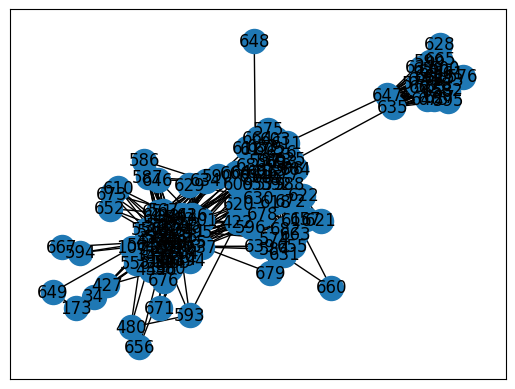

In [22]:
cc_facebook_network=longest_connected_components(facebook_network) # facebook connected ccomponents

None


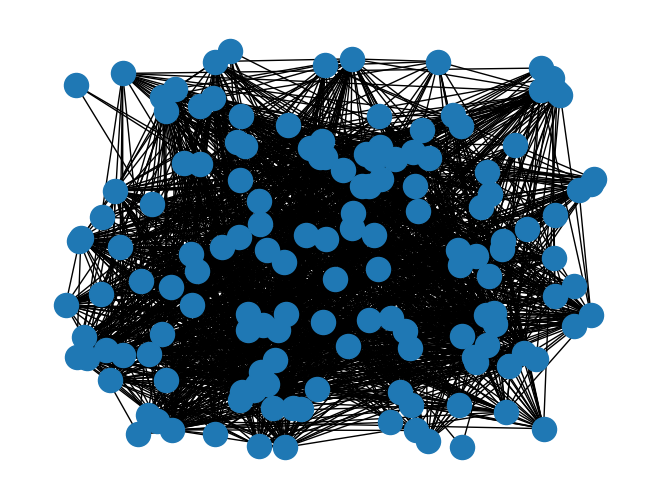

In [23]:
print(nx.draw_random(cc_facebook_network)) #A random plot for largest connected component of facebook network

None


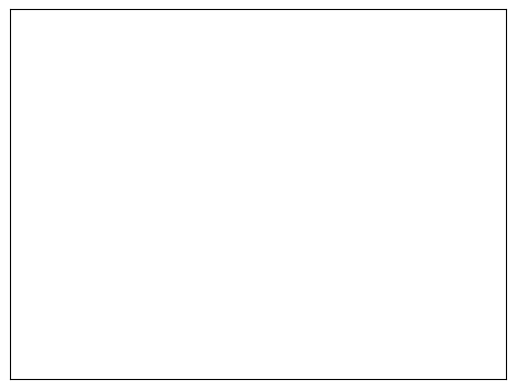

In [24]:
c_twitter_network=longest_connected_components(twitter_network) #for twitter connected ccomponents

In case of twitter network we could not find any subgraph, therefore we can say  that the longest connected graph is its own. Lets see the largest connected components of Tweeter Network.


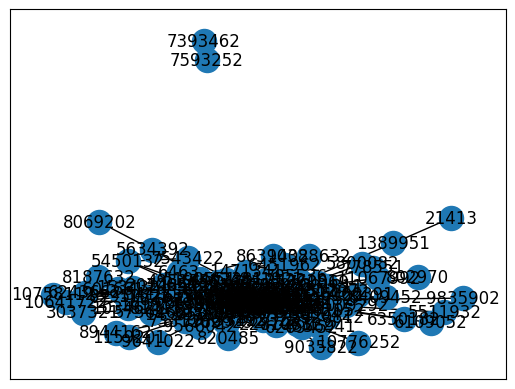

In [25]:
cc_twitter_network=twitter_network
nx.draw_networkx(cc_twitter_network)

In [26]:
list(cc_facebook_network.nodes)#list of longest connected components  of facebook nodes

['650',
 '647',
 '461',
 '544',
 '614',
 '515',
 '363',
 '348',
 '436',
 '428',
 '400',
 '591',
 '636',
 '630',
 '500',
 '524',
 '553',
 '561',
 '651',
 '597',
 '619',
 '664',
 '666',
 '606',
 '438',
 '370',
 '556',
 '373',
 '665',
 '583',
 '633',
 '680',
 '434',
 '566',
 '604',
 '683',
 '609',
 '376',
 '475',
 '465',
 '580',
 '632',
 '483',
 '579',
 '643',
 '681',
 '577',
 '578',
 '395',
 '663',
 '596',
 '676',
 '635',
 '671',
 '492',
 '567',
 '542',
 '637',
 '684',
 '627',
 '422',
 '412',
 '558',
 '589',
 '685',
 '575',
 '623',
 '625',
 '646',
 '654',
 '611',
 '431',
 '600',
 '582',
 '559',
 '378',
 '612',
 '644',
 '588',
 '599',
 '662',
 '645',
 '513',
 '617',
 '678',
 '640',
 '107',
 '394',
 '592',
 '603',
 '514',
 '615',
 '620',
 '506',
 '423',
 '601',
 '669',
 '628',
 '480',
 '629',
 '391',
 '563',
 '634',
 '590',
 '618',
 '587',
 '173',
 '496',
 '641',
 '661',
 '670',
 '649',
 '672',
 '573',
 '605',
 '653',
 '655',
 '374',
 '626',
 '677',
 '427',
 '616',
 '595',
 '584',
 '598',


In [27]:
list(cc_twitter_network.nodes) #list of longest connected components of twitter nodes.

['1044771',
 '7423322',
 '9921142',
 '4556941',
 '2916671',
 '1049111',
 '17743',
 '1452261',
 '1403031',
 '1049981',
 '1118161',
 '1117341',
 '6100262',
 '51421542',
 '991221',
 '814153',
 '1116721',
 '795536',
 '1269251',
 '1468951',
 '2217251',
 '5516192',
 '1044591',
 '1118781',
 '1975721',
 '678953',
 '8956052',
 '5515802',
 '6277512',
 '1045141',
 '6550132',
 '1047451',
 '5920812',
 '14106930',
 '5066391',
 '1043241',
 '11726932',
 '1047961',
 '1268821',
 '6752812',
 '1478151',
 '5653212',
 '6194262',
 '18498684',
 '11067992',
 '6312972',
 '6945012',
 '1478471',
 '7715252',
 '1048661',
 '10776252',
 '6354792',
 '6243662',
 '8295072',
 '6745742',
 '5678622',
 '3956091',
 '1476651',
 '9566042',
 '7884642',
 '2014851',
 '9952802',
 '10998792',
 '5659662',
 '5697472',
 '5450132',
 '4952751',
 '1534321',
 '6269452',
 '13332922',
 '6149912',
 '2681811',
 '5885472',
 '6451962',
 '4379101',
 '7065032',
 '6109052',
 '4841921',
 '6350182',
 '760069',
 '3527151',
 '8706322',
 '7305042',
 '1

If you want to see the full view then kindly open it in a text editor.